In [1]:
# Libraries
import glob, os
import rasterio
from rasterio.plot import show
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pymannkendall as mk 

In [2]:
yearly_lst = []

os.chdir("E:/NIT_RKL/Other_Work/SUHI_sreoshi/Data/kolkata_LST_yearly_2000_03_01_to_2022_02_28")
for file in sorted(glob.glob("*.tif")):
    yearly_lst.append(file)
yearly_lst

['kolkata_yearly_LST_00.tif',
 'kolkata_yearly_LST_01.tif',
 'kolkata_yearly_LST_02.tif',
 'kolkata_yearly_LST_03.tif',
 'kolkata_yearly_LST_04.tif',
 'kolkata_yearly_LST_05.tif',
 'kolkata_yearly_LST_06.tif',
 'kolkata_yearly_LST_07.tif',
 'kolkata_yearly_LST_08.tif',
 'kolkata_yearly_LST_09.tif',
 'kolkata_yearly_LST_10.tif',
 'kolkata_yearly_LST_11.tif',
 'kolkata_yearly_LST_12.tif',
 'kolkata_yearly_LST_13.tif',
 'kolkata_yearly_LST_14.tif',
 'kolkata_yearly_LST_15.tif',
 'kolkata_yearly_LST_16.tif',
 'kolkata_yearly_LST_17.tif',
 'kolkata_yearly_LST_18.tif',
 'kolkata_yearly_LST_19.tif',
 'kolkata_yearly_LST_20.tif',
 'kolkata_yearly_LST_21.tif']

In [52]:
sample_file = rasterio.open("E:/NIT_RKL/Other_Work/SUHI_sreoshi/Data/kolkata_LST_yearly_2000_03_01_to_2022_02_28/kolkata_yearly_LST_00.tif")
profile=sample_file.profile
test_file = sample_file.read(1)
test_file.shape                          

(78, 55)

In [3]:
df = pd.DataFrame()

for year in yearly_lst:
    
    file = rasterio.open("E:/NIT_RKL/Other_Work/SUHI_sreoshi/Data/kolkata_LST_yearly_2000_03_01_to_2022_02_28/"+year)
    file = file.read(1)
    file = file.reshape(-1)
    df[f"LST_{year[-6:-4]}"] = file
df =  df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289
LST_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(22, 4290)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
mmk_result =pd.DataFrame()
for column in df:
    values = round(df[column],3)
    if np.all(str(np.max(values)) != str(np.min(values))):
        [trend,h,p,z,Tau,s,var_s,slope,intercept]=mk.hamed_rao_modification_test(values, alpha=0.05)
        output = [trend,h,p,z,Tau,s,var_s,slope,intercept]
        
        mmk_result[column] = output
    else:
        mmk_result[column] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
        
new_index = ['trend','h','p','z','Tau','s','var_s','slope','intercept']
mmk_result['result'] = new_index
mmk_result = mmk_result.set_index('result')
mmk_result.head(10)


,0,1,2,3,4,5,6,7,8,9,...,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289
result,,,,,,,,,,,,,,,,,,,,,
trend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
LST_Slope = mmk_result.loc['slope']
LST_Slope.shape

(4290,)

<AxesSubplot:>

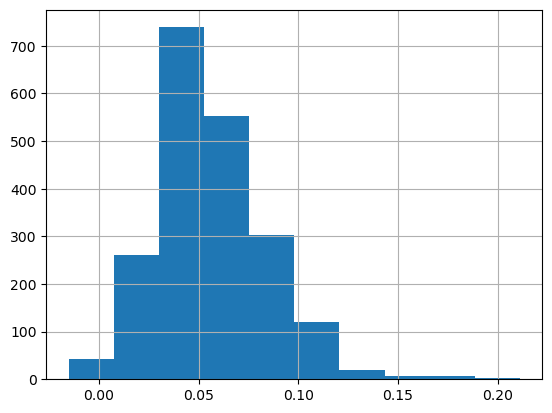

In [33]:
LST_Slope.hist()

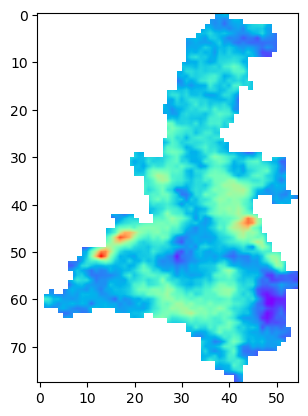

In [81]:
%matplotlib inline
slope_img = np.array(LST_Slope).reshape(test_file.shape )
arr = np.round(slope_img.astype('float64'),3)
plt.imshow( arr, cmap = 'rainbow' , interpolation = 'bilinear')


In [28]:
profile

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 55, 'height': 78, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008983152841195215, 0.0, 88.0618473022367,
       0.0, -0.008983152841195215, 23.02382073198334), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In [83]:
os.chdir("E:/NIT_RKL/Other_Work/SUHI_sreoshi/Data/kolkata_LST_yearly_2000_03_01_to_2022_02_28/")
with rasterio.open('kolkata_LST_Slope.tif', 'w', **profile) as dst:
    dst.write(np.round(arr,3), indexes=1)

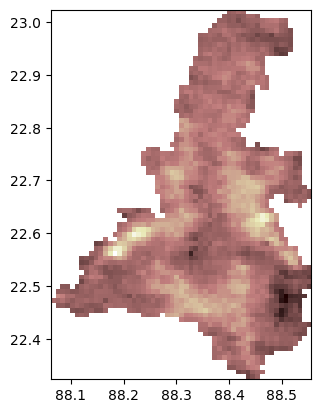

<AxesSubplot:>

In [84]:
sample1 = rasterio.open('E:/NIT_RKL/Other_Work/SUHI_sreoshi/Data/kolkata_LST_yearly_2000_03_01_to_2022_02_28/kolkata_LST_Slope.tif')
sample2 = sample1.read(1)
show(sample1, cmap ='pink', adjust = True)

In [82]:
np.unique(arr)

array([-0.015, -0.014, -0.012, -0.011, -0.01 , -0.008, -0.007, -0.005,
       -0.004, -0.002, -0.001,  0.   ,  0.001,  0.003,  0.004,  0.005,
        0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,
        0.014,  0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,
        0.022,  0.023,  0.024,  0.025,  0.026,  0.027,  0.028,  0.029,
        0.03 ,  0.031,  0.032,  0.033,  0.034,  0.035,  0.036,  0.037,
        0.038,  0.039,  0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,
        0.046,  0.047,  0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,
        0.054,  0.055,  0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,
        0.062,  0.063,  0.064,  0.065,  0.066,  0.067,  0.068,  0.069,
        0.07 ,  0.071,  0.072,  0.073,  0.074,  0.075,  0.076,  0.077,
        0.078,  0.079,  0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,
        0.086,  0.087,  0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,
        0.094,  0.095,  0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,
      